In [1]:
# execute this cell before you start
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2024-03-18 20:19:35.375262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1



## To open virtual environment

source tfvenv/bin/activate

#  CA2

to submit the assignment, please do the following:

- make sure that the notebook runs through and produces all desired output after `Kernel -> Restart & Run all`
- running through the whole notebook must not take no more than 60 minutes on a standard computer, similar to our lab-computers, without GPU and 8GB of RAM
- save the notebook (CA2.ipynb)
- upload the file `CA2.ipynb` to canvas.
- note that Google Colab ipynb files do not work with the nbgrader system I use to grade assignments and are therefore not allowed. 


# Q1 The CIFAR-10 dataset.

(10 marks)

Consider the data in  [`keras.datasets.cifar10`](https://www.tensorflow.org/datasets/catalog/cifar10) and train a network which reliably categorizes the data. 
Try to understand tradeoffs:

- What increases computing time?
- What increases accuracy?

This dataset has its own [Wikipedia page](https://en.wikipedia.org/wiki/CIFAR-10), and is often used as benchmark for new proposed methods. 
You can take the cat/dog example from the lecture as a starting point, but you can also find plenty of inspiration in the Internet.  As before, it is not forbidden to get such inspiration, but please stay in the framework of what is covered in the lecture and clearly cite from where you take what. 


To get you started, here some code to show with which you can browse the data:

In [2]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_data,train_labels),(test_data,test_labels) = keras.datasets.cifar10.load_data()


from ipywidgets import interact

@interact(k=(0, len(train_data)-1))
def myplot(k):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_title(labels[train_labels[k][0]])
    ax.imshow(train_data[k])


interactive(children=(IntSlider(value=24999, description='k', max=49999), Output()), _dom_classes=('widget-int…

## 1. Visualize the data
print shape of training/test data and labels

In [3]:
print("Training images shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
max(train_labels)

array([9], dtype=uint8)

Plot to see the first few training images

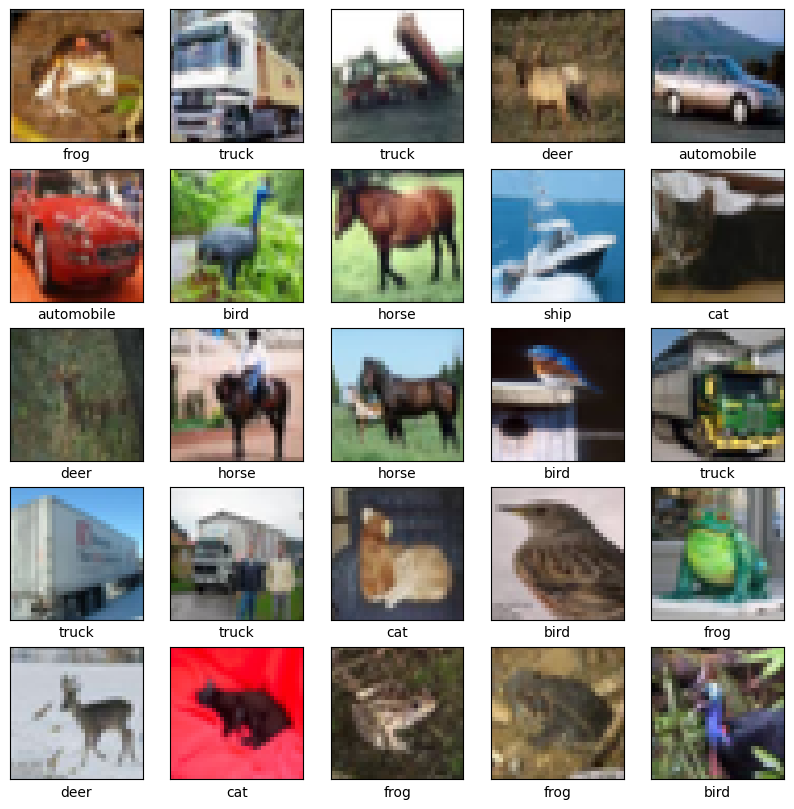

In [5]:
import matplotlib.pyplot as plt

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):  # Displaying the first 25 images
    plt.subplot(5, 5, i+1)  # 5x5 grid, position i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    # Replace train_labels[i] with labels[train_labels[i][0]] to display the class name
    plt.xlabel(labels[train_labels[i][0]])
plt.show()


## 2. Preprocess the data
Normalizing image data, this is done to change the pixel values from 0-255 to a range between 0-1, this makes computations easier

In [6]:
# normalize image data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

One hot encoding the labels, this is done for multi class classification problems such as CIFAR-10. this is used by many loss functions inlcluding categorical cross entropy suited for this data

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

Create training and validation datasets

In [8]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

## 3. Data augmentation


Data source train_ds is the cifar-10 training dataset in the form of a tf.data.Dataset

In [9]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float64, name=None))>

Code used to retreive labels of train data

In [10]:
tmp = train_ds.take(1)
list(tmp)[0][1]


2024-03-18 20:19:48.563095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(32, 10), dtype=float64, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.,

This defines the data augmentation steps

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)  # rotates by up to 36 degrees
])

Visualisation: after applying augmenation, the images are displayed to verify the augmentation effect.

Here the augmentation is applied to the first 9 images

2024-03-18 20:19:49.381237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


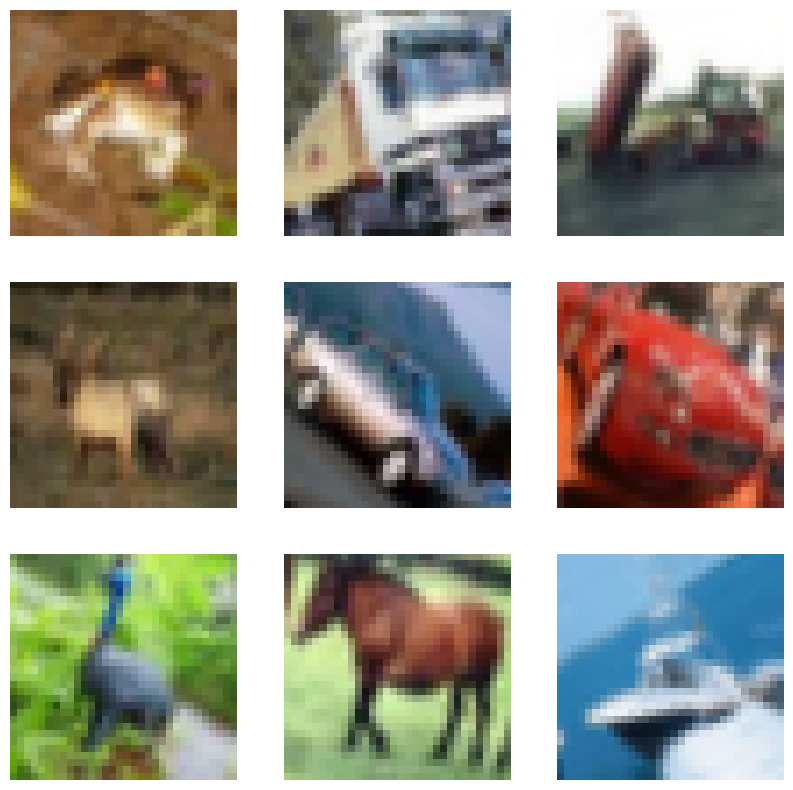

In [12]:
images, _ = list(train_ds.take(1))[0]

plt.figure(figsize=(10, 10))

# Displaying the first 9 augmented images
for i in range(9):
    augmented_image = data_augmentation(tf.expand_dims(images[i], 0))# augments the ith image 
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0].numpy())  
    plt.axis("off")

plt.show()


Here augmentation is appied to the first image 9 times

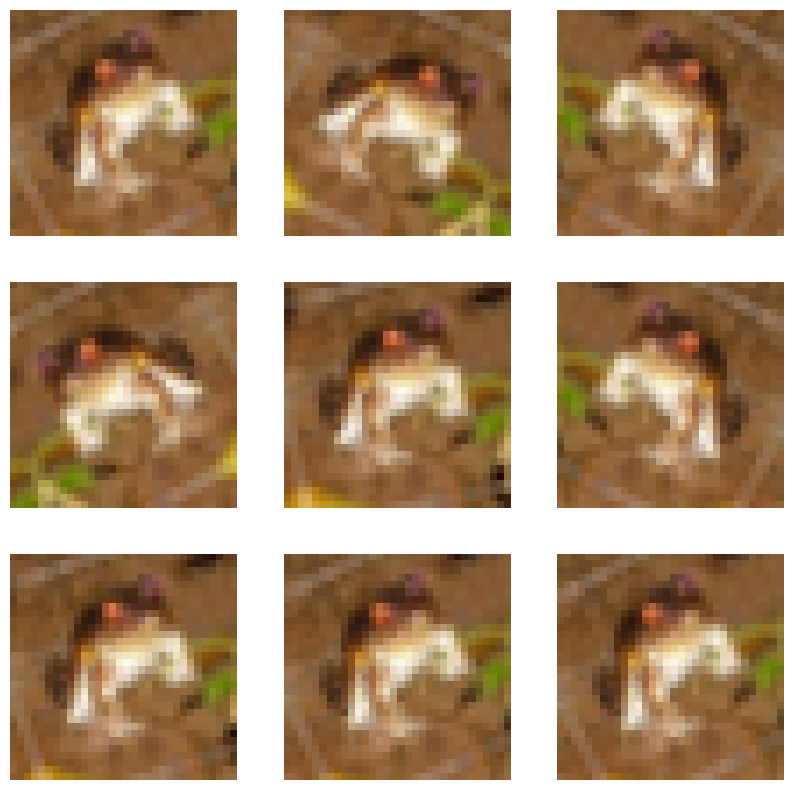

In [13]:
plt.figure(figsize=(10, 10))

# Apply data augmentation to the first image in the batch


# Displaying the first augmented image 9 times
for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    # Display the first augmented image
    plt.imshow(augmented_image[0].numpy())
    plt.axis("off")




Display the summary of the data augmentation model, showing the sequence of transormation that is applied to input images, contains **2 layers**.

**Random flip:** layer responsible for randomly flippiing images horizontaly 

**Random rotation:** layer responsible for randomly rotating them within a range of 0.1 / 36 degrees

**Output Shape:** for both layers is 1,32,32,3 where a single image is processed then  image size being 32x32 x 3 colour channels(RGB)

**Param**: there are 0 parameters since data augmentation doesnt involve learning

In [14]:
data_augmentation.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (1, 32, 32, 3)         │             0 │
│ (RandomRotation)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Gives the dimesnions of the images tensor 

In [15]:
images.shape

TensorShape([32, 32, 32, 3])

## 4. Building the model

Multiple Conv2D layers: These layers are used for feature extraction. Each Conv2D layer learns different features from the images with a varying number of filters and kernel sizes. The use of multiple such layers in sequence allows the model to learn a hierarchy of features, from simple edges in the early layers to complex shapes and objects in the deeper layers.

Activation layers ('relu'): The ReLU activation function introduces non-linearity, enabling the network to learn more complex patterns.

Dropout layers: These layers help prevent overfitting by randomly zeroing out a fraction of the outputs from the previous layer. This forces the network to not rely too much on any one node, thus learning more robust features.

Flatten layer: Converts the 2D feature maps to a 1D feature vector, necessary for the fully connected layers.

Dense layers: Fully connected layers that learn global patterns in the image.

BatchNormalization: Used to standardize the inputs to a layer, which stabilizes and speeds up the learning process.

Softmax activation in the output layer: Suitable for multi-class classification like CIFAR-10

Used the paper STRIVING FOR SIMPLICITY:
THE ALL CONVOLUTIONAL NET (Kingma & Ba, 2014) as inspiration for the model .



/Users/douglas/tfvenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


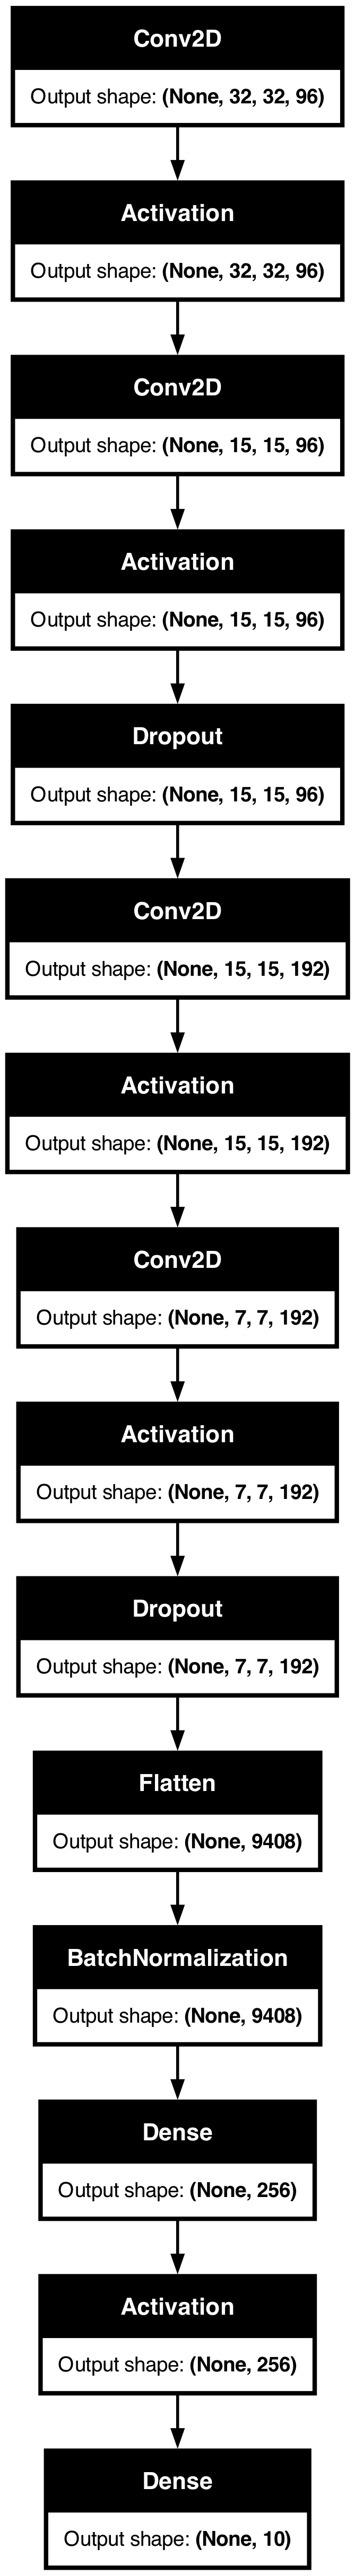

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, Flatten, Dense, BatchNormalization

# CIFAR-10 has 10 classes
n_classes = 10

# Create a sequential model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(input_shape=train_data.shape[1:], filters=96, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

# Second Convolutional Block with Stride to reduce the image spatial size
model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=2, padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.2))  # Regularization with Dropout

# Third Convolutional Block
model.add(Conv2D(filters=192, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))

# Fourth Convolutional Block with Stride
model.add(Conv2D(filters=192, kernel_size=(3, 3), strides=2, padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout for more regularization

# Flattening the volume to feed to the Dense layers
model.add(Flatten())
model.add(BatchNormalization())  # Normalize and scale inputs or activations

# Fully Connected Layers
model.add(Dense(256))  # Dense layer with 256 units
model.add(Activation('relu'))
model.add(Dense(n_classes, activation="softmax"))  # Output layer with softmax for multi-class classification


# plot model
keras.utils.plot_model(model, show_shapes=True)



In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 15, 15, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 9408)           │        37,632 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,408,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,032,682 (11.57 MB)

 Trainable params: 3,013,866 (11.50 MB)

 Non-trainable params: 18,816 (73.50 KB)

## 5. Compiling the model 

**Optimizer:** Adam optimizer was chosen as it is designed to handle sparse gradients on noisy data, which is common in image classification

**Loss function**: Categorical Cross entropy was used as it is most useful when there are 2 or more label classes

**Metric**: Accuracy was used because as its the most practical and useful metric to measure the performace of the training data

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 6. Training the model

In [19]:
n_epochs = 6  # The number of times the model will cycle through the data
batch_size = 256  # The size of the batches of data (number of images) that will be used


callbacks_list = None

# Start training the model with the CIFAR-10 dataset
H = model.fit(train_data, train_labels,  # training data and labels
              validation_data=(test_data, test_labels),  #testing data and labels
              epochs=n_epochs, 
              batch_size=batch_size, 
              callbacks=callbacks_list)

print('Done!!!')


Epoch 1/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.3708 - loss: 1.7282 - val_accuracy: 0.3456 - val_loss: 2.0671
Epoch 2/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5765 - loss: 1.1820 - val_accuracy: 0.5830 - val_loss: 1.7781
Epoch 3/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.6617 - loss: 0.9463 - val_accuracy: 0.6725 - val_loss: 1.1062
Epoch 4/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.7143 - loss: 0.7964 - val_accuracy: 0.7249 - val_loss: 0.7949
Epoch 5/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.7502 - loss: 0.7007 - val_accuracy: 0.7246 - val_loss: 0.7997
Epoch 6/6
196/196 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.7807 - loss: 0.6146 - val_accuracy: 0.7624 - val_loss: 0.6970
Done!!!


# 7. Evaluating the model
Once the model has been trained, the model is evaluated on the unseen test data. if the model performs well on the training data but poorly on the test data this can indicate overfitting. Accuracy, precision, recall etc. can be measured and indicate if further tuning is needed.

In [20]:
# use the first image from the test_data 
img_array1 = test_data[0]  
img_array = tf.expand_dims(img_array1, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
predicted_class = np.argmax(score)

# use the labels list to get the predicted class name
print(
    "This image is %.2f percent %s."
    % (100 * score[predicted_class], labels[predicted_class])
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
This image is 72.78 percent cat.


Plot of the image 

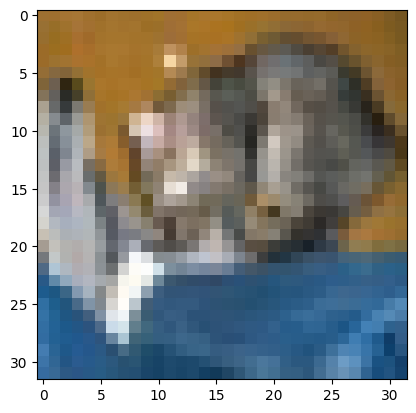

In [21]:
plt.imshow(img_array1)

Printout of all predictions of the image

In [22]:
# Get model predictions for the image
predictions = model.predict(img_array)
scores = predictions[0]

# Print out the scores for each class
for i, score in enumerate(scores):
    print(f"This image is {score * 100:.2f} percent {labels[i]}.")

# highlight the most likely class:
predicted_class = np.argmax(scores)
print(f"\nThe model is most confident about {labels[predicted_class]}, with a confidence of {scores[predicted_class] * 100:.2f} percent.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This image is 0.01 percent airplane.
This image is 0.05 percent automobile.
This image is 0.27 percent bird.
This image is 72.78 percent cat.
This image is 0.07 percent deer.
This image is 24.89 percent dog.
This image is 1.68 percent frog.
This image is 0.15 percent horse.
This image is 0.09 percent ship.
This image is 0.01 percent truck.

The model is most confident about cat, with a confidence of 72.78 percent.


Model accuracy

In [23]:
loss, accuracy = model.evaluate(val_ds)
print(f"Model accuracy on the test set is: {accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.7657 - loss: 0.6858
Model accuracy on the test set is: 76.24%


# 8.  Q1  (10 marks)
**My initial model 1 was very slow and inaccurrate, it took just under an hour however its accuracy wasnt good <50% :**
```python
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)  #  data augmentation here

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Adding a few convolutional blocks
    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Adding the final layer
    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    
    # Set the correct activation and number of units for CIFAR-10
    activation = "softmax"  # 'softmax' for multi-class classification
    units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

# Adjust `input_shape` for CIFAR-10 images and `num_classes` for 10 classes
model = make_model(input_shape=(32, 32, 3), num_classes=10)
  # Display the model architecture

# Optional: Plot the model 
keras.utils.plot_model(model, show_shapes=True)
```

**My model 2 was very fast <20mins  however its accuracy 68%-70% wasnt as good as my final model, doesnt have  pooling layers or Batch normalization**
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, Flatten, Dense

# Number of output classes (CIFAR-10 has 10 classes)
n_classes = 10

# Create a sequential model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(input_shape=train_data.shape[1:], filters=32, use_bias=True, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.1))  # Dropout to prevent overfitting

# Second Convolutional Layer with Strides
model.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model.add(Activation('relu'))

# Additional Dropout
model.add(Dropout(0.2))

# Flattening the volume to feed into Dense Layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128))
model.add(Activation('relu'))

# Additional Dropout
model.add(Dropout(0.3))

# Output Layer with Softmax activation for multi-class classification
model.add(Dense(n_classes, activation="softmax"))


```
**Therefore I changed my entire model after considering what worked and what didnt, comparing model 2 to my final model there was  a tradeoff of increasing computing time but also increasing accuracy**

### What increases computing time?

**Data augmentation & Data size:** : training on large datasets  increases the amount of data that needs to be processed, in the same vein, on the fly data augmentation within the model can increase training/computing time since it generates augmented data during training, this adds significant computational time for each epoch. That is why it was removed in the final model which was a tradeoff to use computation for other parts of the model.

**Data dimensions**: higher resolution images/larger input sizes mean more pixels/features for the model to process, increasing computing time

**Complex model architecture**: More layers and filter in the model mean more trainable parameters, which increases the amount of computation required. This can significantly slow down training time. 

**Batch size:** large bbatch size requires more memory and computational time.

**Batch normalization**: while beneficial for model traing, bach normalization adds computational complexity, this computes  means and variance for input which slows down training.

**High Dropout rate**: a high dropout of 0.5, can slow down model convergance, which can lead to discarding useful feature makeing the learning process less efficient.

**absence of pooling layers**: pooling layers reduce height and width of inputs for the next convultion layer. not including these means the model has to process more data through more layers. 

**Training duration/ Epochs:** more trainiing epochs mean the model iterates over the data more times increasing training time.

### What increases accuracy?

**Data augmentation(regularisation):** applying data augmentation can increase the model accuracy by artificially enlargeneing the training datase, this helps the model generalise better to unseen data.

**model architecture**: More complex architecture allows the model to learn and represent more more complex patterns and relationships in the data which can improve accuracy, however there is a tradeoff between complexity and overfitting risk.

**Batch normalization**: stabilises the learning process by normalizing inputs or activiations of each layer, which can lead to better model accuracy as it prevents  model from being configured poorly

**optimized Dropout rate(regularisation)**: dropout rates configured correctly can help prevent overfitting by randomly disabling neurons during training, the is helps the model generalise well to new data which can increase accuracy

**pooling layers**:pooler layer can reduce dimensionality of feature maps This aids in taking the most important features from the inputs, contributing to improved accuracy.

**Data Quality & Quantity**: more high quality, diverse and relevant training data can imporive the models ability to generalize, thus increasing accuracy.

**Optimisation Algortithms**: advanced optimizers like adam, RMSprop or SGD find the best parameters (weights) for the model that minimizes the loss function thus increasing accuracy.

**Hyerparameter tuning**: carefuuly tuning hyperparameters including learning rate, batch size etc. can significantly impact model performance and accuracy.

### Tradeoffs

When transitioning from model 2 to the final model, the primary trade-off was between training speed and model accuracy. By adding pooling layers and batch normalization, and optimizing dropout rates, there was an increase in the model's ability to learn from the CIFAR-10 dataset more effectively, thereby improving accuracy with increased computing time.

### References
D. P. Kingma and J. Ba, "Adam: A Method for Stochastic Optimization," arXiv:1412.6806, 2014. [Online]. Available: https://arxiv.org/pdf/1412.6806.pdf

# Q2 Deep Learning in Earth Science 


Consider the notebook [Bamboo_forest_detection.ipynb](https://colab.research.google.com/github/totti0223/deep_learning_for_biologists_with_keras/blob/master/notebooks/bamboo_forest_detection.ipynb) on using machine learning for detecting vegetation from satellite images

a) Adapt the code such that it runs in the `tfenv` environment. If necessary, install missing packages. Explain your modification in detail. (4 marks)

b) Thoroughly explain the code in this notebook by adding markdown cells starting with "# CA" (6 marks)

# CA  Q (b)
In this cell, all required packages/librares are imported in the `tfenv` environment. `slidingwindow`for segmenting satellite images into smaller patches`numpy` for numerical operations, `os` for interacting with the file system, and `matplotlib` for plotting. For neural network construction and training,  import from `keras`. `sklearn` for calcultating class weights and handles imbalances in the dataset and `skimage` for image processing. These packages/libraries are essential for the notebook to run without issues in the `tfenv` environment.


In [24]:
import slidingwindow as sw
import numpy as np
import os
import keras.backend as K
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from sklearn.utils.class_weight import compute_class_weight

# CA Q (b)
In the next cell, the dataset containing satellite images used for training the neural network to detect bamboo forests is downloaded. The dataset is a zip file that is fetched using the `wget` command and then extracted into the working directory using `unzip`. This process populates the `tfenv` environment with the necessary data so that it can then be preprocessed in the next step


In [25]:
!wget https://raw.githubusercontent.com/totti0223/k4b_datasets/master/bamboo.zip bamboo.zip
!unzip -P bamboo bamboo.zip

--2024-03-18 20:51:30--  https://raw.githubusercontent.com/totti0223/k4b_datasets/master/bamboo.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28240432 (27M) [application/zip]
Saving to: 'bamboo.zip'

bamboo.zip          100%[===================>]  26.93M   818KB/s    in 39s     

2024-03-18 20:52:12 (709 KB/s) - 'bamboo.zip' saved [28240432/28240432]

--2024-03-18 20:52:12--  http://bamboo.zip/
Resolving bamboo.zip (bamboo.zip)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address 'bamboo.zip'
FINISHED --2024-03-18 20:52:12--
Total wall clock time: 42s
Downloaded: 1 files, 27M in 39s (709 KB/s)
Archive:  bamboo.zip
   creating: bamboo/
   creating: bamboo/test/
  inflating: bamboo/test/test_image.

# CA Q (b)

Before  model training, it's essential to understand the data. This cell uses the `ls` command to list the contents of the training directory. This explains the naming convention used in the dataset, images containing only bamboo forests are prefixed with 'b', while those without are prefixed with 'o'. This information is important to differentiate between the two classes of images.


In [26]:
!ls bamboo/train
#image names starting with "b" is image with only bamboo forest.
#image names starting with "o" is image without bamboo forest.

b1.png  b12.png b2.png  b5.png  b8.png  o10.png o4.png  o7.png
b10.png b13.png b3.png  b6.png  b9.png  o2.png  o5.png  o8.png
b11.png b14.png b4.png  b7.png  o1.png  o3.png  o6.png  o9.png


# CA Q(b)
Visualisation of data:  one shows a bamboo forest and another without it.This ensures that the images are loaded correctly. This visual check can also help in identifying any problems in the data that might need to be fixed.


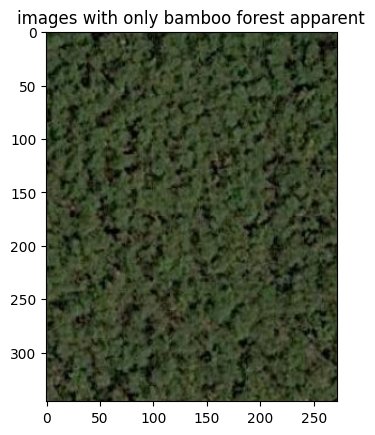

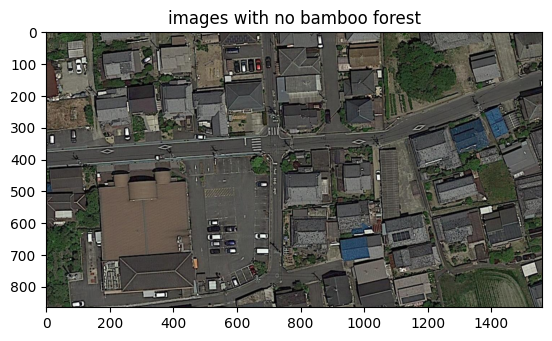

In [27]:
plt.title("images with only bamboo forest apparent")
plt.imshow(imread("bamboo/train/b5.png"))
plt.show()

plt.title("images with no bamboo forest")
plt.imshow(imread("bamboo/train/o10.png"))
plt.show()

# CA Q (b)

This code is a pre-processing step, it creates "patches" from each larger image using a sliding window approach, this handles large image size and more training data can be extracted this way. The `save_to_folder` function iterates through all images from the given path, generates patches, and then saves these patches to the target directory.

This increases the amount of samples for the model to train on and recognize bamboo forests from smaller parts of the whole image, making the model more robust and better at generalizing. 

In [28]:
def save_to_folder(img_path,directory,size=56,overlap=0.4):
    #read imag from path save windows to the specified directory
    img = imread(img_path)
    basename = os.path.basename(img_path)
    fname = os.path.splitext(basename)[0]
    windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, size, overlap)
    for i,window in enumerate(windows):
        ii = str("{0:05d}".format(i))
        _fname = fname + "_" + ii + ".png"
        _img = img[window.indices()]
        if _img.shape !=(size,size,3):
            continue
        img_target_path = os.path.join(directory,_fname)
        
        imsave(img_target_path,_img)
        
files = os.listdir("bamboo/train/")
files = [x for x in files if x.endswith(".png")]

for file in files:
    save_directory = "bamboo/chopped"
    file = os.path.join("bamboo/train/",file)
    save_to_folder(file,save_directory)

# CA Q (b)
The patches are then loaded into arrays `x` and `y`, where `x` holds the image data, and `y` holds the corresponding labels (1 for bamboo and 0 for non-bamboo). The shapes of the resulting arrays indicate that  all samples 3492 have a resolution of 56x56 pixels and 3 color channels.

In [29]:
files = os.listdir("bamboo/chopped/")
files = [x for x in files if x.endswith(".png")]

x = []
y = []

for file in files:
    if file.startswith("b"):
        label = 1
    else:
        label = 0
    
    img_path = os.path.join("bamboo/chopped",file)
    img = load_img(img_path)
    img = img_to_array(img)/255
    x.append(img)
    y.append(label)

x = np.array(x)
y = np.array(y)
print(x.shape,y.shape)

(3492, 56, 56, 3) (3492,)


# CA Q (b)
The arrays are then split into training and validation sets using `train_test_split`, with 20% of the data used for validation to evaluate models perfomance . The shapes of the resulting arrays indicate that there are 2793 training samples and 699 validation samples, each with a resolution of 56x56 pixels and 3 color channels.

In [30]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.2,stratify = y)

print(train_x.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)

(2793, 56, 56, 3)
(2793,)
(699, 56, 56, 3)
(699,)


# CA  Q (a) + (b)

**Q (a) Modified code**: 
The original code for computing class weights was modified as there was TypeError: too many positional argument, The modified code  names the parameters, which ensures that each argument is correctly associated with its corresponding parameter in the function.

`compute_class_weight` In the original snippet:

```python
cw = compute_class_weight("balanced", np.unique(train_y), train_y)

 ```
 
**Q (b):**  the `compute_class_weight` function for calcultating class weights and handles imbalances in the dataset, this gives 
class weights  used during model training to give more emphasis to under-represented classes, to improve the model's performance on those classes.

In [31]:
#compute class weight
print(np.unique(train_y,return_counts=True))
print(np.unique(valid_y,return_counts=True))

cw = compute_class_weight(class_weight = "balanced",classes = np.unique(train_y),y = train_y)

print(cw)

(array([0, 1]), array([ 700, 2093]))
(array([0, 1]), array([175, 524]))
[1.995      0.66722408]


# CA Q (b)

A convolutional neural network (CNN) model is defined.
The model consists of three convolutional layers, each followed by a max-pooling layer and dropout for regularization to prevent overfitting. The convolutional layers extract features from the input images, and the pooling layers reduce the dimensions of the feature maps. for image classification these layers allow the network to learn hierarchical feature representations. 

The network ends with a fully connected dense layer and a final output layer with a sigmoid activation function for binary classification.

The model is then compiled with the Adam optimizer and binary crossentropy loss, which is used on binary classification problems. Accuracy was used because  its the most practical and useful metric to measure the performace of the training data. 

 `model.summary()` shows the layers and parameters that will be learned during training.


In [32]:
model = Sequential([
    layers.Conv2D(16,(3,3),name="conv1",input_shape=(56,56,3),activation="relu",padding="same"),   
    layers.MaxPool2D((2,2),name="pool1"),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),name="conv2",padding="same"),
    layers.Activation("relu"),
    layers.MaxPool2D((2,2),name="pool2"),
    layers.Dropout(0.2),
    layers.Conv2D(32,(3,3),name="conv3",padding="same"),
    layers.Activation("relu"),
    layers.MaxPool2D((2,2),name="pool3"),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1),
    layers.Activation("sigmoid",name="prediction")
]
)

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

model.summary()

/Users/douglas/tfvenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 56, 56, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ prediction (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,817 (448.50 KB)

 Trainable params: 114,817 (448.50 KB)

 Non-trainable params: 0 (0.00 B)

# CA Q (a) + (b)

**Q (a) modified code:** `batch_size` , The code for training the model has been modified to address the issue of the number of steps per epoch previously being 88 due to default batch size being 32 when not specified. To change the steps per epoch with the number of training samples (2793), the `batch_size` was set to 1.

`class_weights` was added  as a dictionary used in the model.fit because an AttributeError was encountered in the previous codes model training process. The error happened because the original `cw` variable, intended for the `class_weight` parameter, was a numpy array rather than the expected dictionary format. 

Previous code:
```python
history = model.fit(train_x,train_y,epochs=10,validation_data=(valid_x,valid_y),class_weight=cw)
```

***Q (b)***
`class_weights` code is used for the model training phase,   to addresses class imbalance and provide clarity on the training and validation process, class 0 is given a higher weight (1.995) compared to class 1 (0.66722408)

The `print` statement is a simple  way to log the number of samples used for training and validation

The `history` object records the training results, which can be used for further analysis and visualization of the model's performance over time.
history records the `model.fit()` results. The `train_x` and `train_y` arrays are used as the training data,  `valid_x` and `valid_y` are the validation data to evaluate the model's performance on unseen data.
The training is run for 10 epochs with a batch size of 1. The `class_weight` parameter applies weights to the classes during training,  



In [33]:
# class weights are the results from cw
class_weights = {0: 1.995, 1: 0.66722408}

print ('Train on 2793 samples, validate on 699 samples')

history = model.fit(train_x, train_y, epochs=10,batch_size=1, validation_data=(valid_x, valid_y), class_weight=class_weights)


Train on 2793 samples, validate on 699 samples
Epoch 1/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - acc: 0.4777 - loss: 0.7019 - val_acc: 0.2504 - val_loss: 0.6962
Epoch 2/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - acc: 0.3378 - loss: 0.7013 - val_acc: 0.2504 - val_loss: 0.6988
Epoch 3/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - acc: 0.3325 - loss: 0.6933 - val_acc: 0.3062 - val_loss: 0.6941
Epoch 4/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - acc: 0.3321 - loss: 0.7081 - val_acc: 0.8784 - val_loss: 0.5759
Epoch 5/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - acc: 0.6827 - loss: 0.5170 - val_acc: 0.7210 - val_loss: 0.8247
Epoch 6/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - acc: 0.9096 - loss: 0.2374 - val_acc: 0.8784 - val_loss: 0.3134
Epoch 7/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - acc: 0.9539 - loss: 0.1246 - val_acc: 0.9328 - val_loss: 0.1640
Epoch 8/10
2793/2793 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - acc: 0.9670 - loss: 0.0938 - val_acc: 0.96

# CA Q (b)
The first part of the code reads a test image using `load_img`, then `img_to_array` converts it into an array, and normalizes the pixel values by dividing by 255.  `matplotlib` displays the image to ensure it's loaded correctly.

Then  subimages (patches) are created from the test image using `slidingwindow` `generate` function creates a set of windows across the image, each window can be an input for the model. The patches are stored in a list and converted into a NumPy array, preparing them for classification by the trained model. 
Overlap parameter is set to 0.6, this determines how much each window overlaps with the next one.

Lastly, to understand the distribution of the generated patches, the code calculates the total number of windows, incluing in the height and width directions.
It iterates through the windows, tracking the change in the `x` position to determine when the windows shift from one row to the next. This information is useful for reconstructing the image from the patches. The print statements output the total number of windows, the number of windows in the width direction (`n_x`), and by dividing the total number by `n_x`, the number of windows in the height direction. This shows how the image is segmented, and is needed for reconstruction of the windows in post-processing.



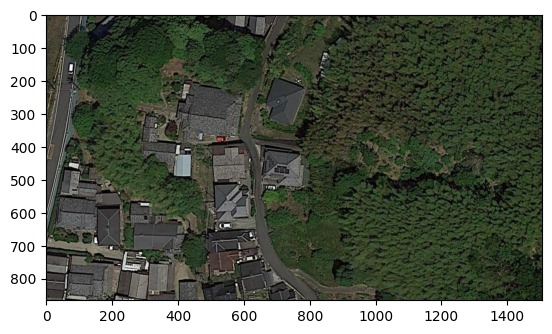

37
2405 37 65


In [34]:
#read test data
img_path = "bamboo/test/test_image.png"
img = load_img(img_path)
img = img_to_array(img)/255
plt.imshow(img)
plt.show()

#create subimages
patches = []
windows = sw.generate(img, sw.DimOrder.HeightWidthChannel, 56, 0.6)
for i,window in enumerate(windows):
    _img = img[window.indices()]
    patches.append(_img)
patches = np.array(patches)

#check total images, how many images are tiled at height direction, and width direction
n_total = len(windows)
_x = 0
for i,window in enumerate(windows):
    if _x != window.x:
        n_x = i
        print(n_x)
        break
    _x = window.x


print(n_total,n_x,n_total//n_x)

# CA Q (b)
This code predicts bamboo presence in cropped images using `model.predict` and reshapes the predictions to match the original image's layout.

`predictions.shape` shows the total predictions made. The array is reshaped, rotated, and flipped to visualize the model's bamboo probability across the image spatially. Displayed using 

`plt.imshow` with a 'jet' colormap, it shows areas likely to contain bamboo.


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
(2405, 1)
[[0.07384473]
 [0.06126075]
 [0.09336831]
 ...
 [0.00182571]
 [0.01261996]
 [0.01005531]]


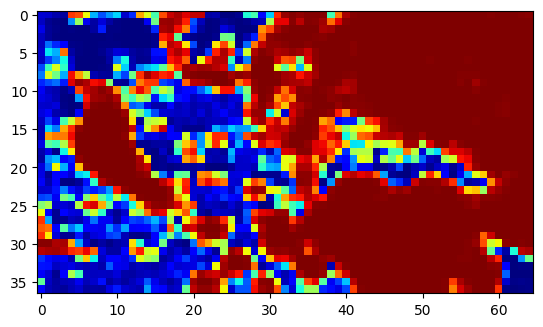

In [35]:
#predict the bamboo probability for all the cropped images, and reshape back to its original form.
predictions = model.predict(patches)
print(predictions.shape)
print(predictions)

bamboo = np.reshape(predictions,(n_total//n_x,n_x))
bamboo = np.rot90(bamboo)
bamboo = np.flip(bamboo,axis=0)
plt.imshow(bamboo,cmap="jet")

# CA Q (b)
The code calculates scaling factors to adjust the prediction map to the original image's size. `h_factor` and `w_factor` represent how many times the height and width of the prediction map need to be increased. 

`zoom` is used to scale the bamboo prediction map by these factors, making its dimensions match the original image. The scaling factors and the new shape of the zoomed prediction map are printed, showing the map has been resized to 851 by 1495 pixels, ready for comparison or overlay with the original image.


In [36]:
h_factor = img.shape[0]//bamboo.shape[0]
w_factor = img.shape[1]//bamboo.shape[1]
print(h_factor)

from scipy.ndimage import zoom
zoomed = zoom(bamboo,(h_factor,w_factor))

print(zoomed.shape)

23
(851, 1495)


# CA Q (b)
This code visualizes the results in two steps. First, it displays the original test image. Next, it overlays the scaled bamboo prediction map on the original image, using a semi-transparent 'jet' colormap. The overlay highlights areas predicted to contain bamboo, with the `alpha` parameter controlling transparency. A color bar is added to understand/interpret the colour map density. This visualization technique helps  compare the model's predictions against the actual image to evaluate the models perfomance.


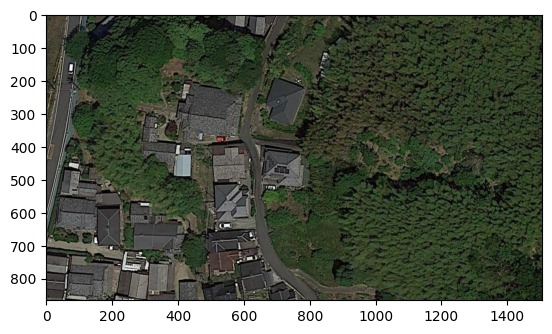

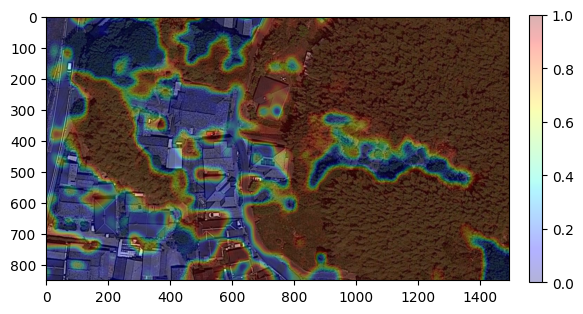

In [37]:
#result
plt.imshow(img)
plt.show()

plt.imshow(img)
plt.imshow(zoomed,alpha=0.3,vmax=1.0,vmin=0,cmap="jet")

plt.colorbar(fraction=0.027, pad=0.04,alpha=0)
plt.show()